# NEURAL NETWORK PLAYGROUND:
# Optical Character Recognition / Optical Music Recognition

## About this Notebook

This is a very simple skeleton for a neural network that tries to recognize ten different glyph classes (with pre-defined options for digits and music symbols), but can easily be adapted to other characters, symbols, and much more. It looks at an 8 x 8 grid of pixels and tries to guess which glyph class it represents. It does so by learning from examples: it looks at a set of glyphs it already knows, adjusts its internal settings (weights and biases), and then gets better at guessing over time. This is called machine learning. Specifically, this program uses a super-easy artificial neural network.

### How it works in principle

Imagine you are teaching a child to recognize signs like digits or music symbols. At first, they do not know anything about that. So you show pictures of numbers (or whatever else) and tell them what they see. The child then adjusts their guesses based on your feedback (correct/wrong). After some time, they know the meaning of the symbols.

In this case, the "child" is a simplistic neural network, and the pictures are grids of pixels (1 means "dark" and 0 means "light"). The network learns from mistakes by constantly adjusting its internal settings (*weights* and *biases*). This is called a "classification task" in ML.

### Input Data

The input to the neural network is an 8 x 8 grid of pixels like it might be used by old computer terminals or dot matrix printers, but also from early OCR/OMR systems for such printouts. For example:

  ```
  0 1 1 1 1 1 1 0
  1 0 0 0 0 0 0 1
  1 0 0 0 0 0 0 1
  1 0 0 0 0 0 0 1
  1 0 0 0 0 0 0 1
  1 0 0 0 0 0 0 1
  0 1 1 1 1 1 1 0
  0 0 0 0 0 0 0 0
  ```

This is a pixel version of the number *0*. There are pre-defined sets for ten digits and ten music notation symbols in the code.

Each of these 64 pixels becomes an *input* to the neural network. If a pixel is dark (1), it means "ink" is there. If a pixel is light (0), it means "no ink" is there.

### Weights and Biases

The network has 'glyph_num' possible answers (one for each pre-defined glyph, currently ten for digits and music symbols) or "classes." For each possible answer, the neural network uses parameters called *weights* and *biases* to decide how much each pixel matters.

#### What are *weights*?

Weights are like importance values. If a weight is high, that pixel is very important for recognizing the specific glyph class. If it is low, the pixel doesn’t matter much.

#### What are *biases*?

A bias is like a "starting guess" for each glyph class, something that "comes to mind" before the algorithm really thought it through. If a bias is high for a certain glyph class, the network leans towards that answer even before thoroughly looking at the input. The network adjusts biases over time to improve accuracy. So biases are like an adjustable starting point for each glyph class.

At first, weights and biases are just random numbers. The network is like a newborn child and has absolutely no clue what anything means.

### Forward Pass: the Thinking Process

Once a glyph class (a pixel combination) is fed into the network, a recognition process will be started:

1. Multiply Inputs by Weights: Each pixel value (0 or 1) is multiplied by its corresponding weight.
2. Add the Bias: To this, the bias for each glyph class is added.
3. Calculate "Logits" (see below): This results in a number of different raw scores, one per glyph class (currently in this code, ten).
4. Apply "Softmax" (see below): These scores are converted into probabilities using a function called softmax.
5. Pick the Best Guess: The glyph class with the highest probability is chosen as the answer.

#### What are *logits*?

A logit is a raw score that an ML model calculates before the final decision. It’s an un-normalized number that tells how strongly the model "believes" in each possible answer before converting those beliefs into probabilities, like a preliminary confidence score.

They are calculated as shown above: multiply pixel value with its weight, add all pixel values in the grid, and add the bias. Logits can be negative and positive values, they are not yet probabilities. Turning them into probabilities is what the softmax function will do during the next step.

#### What is the *softmax* function?

In short, softmax converts logits to probabilities. As logits are quite chaotic numbers, softmax converts them into positive numbers that are "normalized" and, thus, add up to 1.0. Softmax also helps decision-making by spreading the differences more widely. It takes the exponential of each logit (*e ** logit*), making the values positive and exaggerating the differences between logits. These values are added up and normalized to values 0 ... 1. Softmax does not change the order, but adjusts the values.

Probabilities are more practical than logits because you cannot tell the probabilities directly. So, picking the highest option might not be a good option when actually you want to tell that two probabilities are, in fact, very close to each other.

### The Training Process: The Model Learns from its Mistakes

At first, the network makes a lot of mistakes because the weights and biases were completely random when it started. This improves during the training phase. During this,

+ the best guess is compared to the correct solution,
+ errors are evaluated (the difference between the correct answer and what the model predicted), and
+ weights and biases are continuously updated: Important pixels that got ignored increase in weight, misleading pixels decrease, and the bias is adjusted to lean towards the correct answer.

This is repeated several thousand times (5000 times as a standard value, in this code). The optional control output during the training process can show when further training actually does not continue to increase the model's accuracy. This isn't a fancy and shiny "deep neural network" with multiple hidden layers or backpropagation, it's just a humble linear model trained via "gradient descent": cf. the historical sketch, below.

At this point, the network is finalized. The rest of the code runs a series of tests and crosses its fingers.

### Test Cases and Statistics

#### Predefined Test Cases

The code includes two test cases for both glyph sets.

#### Robustness Test: Noisy Input

The program then adds "noise" or "distortion" to a glyph by randomly flipping pixels to check if the network still recognizes it. This tests whether the model has learned real patterns or has simply memorized specific pixels ("overfitting"). In classification, overfitting means the model relies too much on exact training examples instead of generalizing to new inputs. Noise testing is useful in large-scale models, but its impact in this simple demo is really low. -- In generative AI, "overfitted" models would simply copy the input data instead of producing "new" output.

#### Final Statistics

Finally, the code shows a bunch of metrics about how well it worked and performed:

##### Activation Analysis

This data provides a glimpse under the hood: it shows the options that were underlying the final decision. So this is a direct view of the logits and probabilities. Ideally, the model would be trained to a point where there are clear predictions for each number.

##### Training Time

Not so interesting in this case, as 99.9999 % of the time are actually spent with the visual output.

##### Final Training Accuracy

How many percent of the numbers were correctly identified?

##### Loss over Time

Loss measures how wrong the model is: lower loss means better predictions. So, if the loss decreases during training, all is well.

##### Accuracy over Time

Similar to the Final Accuracy, but preserving snapshots from the training process. Hopefully, this should increase during training!

##### Confusion Matrix

A grid of rows (actual digits) and columns (predictions). A perfect model produces a straight diagonal line, mapping predictions to their correct digits. Everything off shows mistakes. So, we can see which glyph classes are the hardest to recognize.

##### Final Weights

After careful consideration, which pixels are considered relevant for each glyph class, and which not so much?

### So, can you get rich and famous from this?

Sorry, but no. The neural network used in this code, a simple linear classifier with softmax and stochastic gradient descent (SGD), has its roots in the very beginnings of artificial intelligence research from the mid-20th century. It's utterly, utterly, utterly outdated, but shows some principles.

Some Historical Breakdown:

#### 1940s to 1950s: Beginnings of Neural Networks

+ The idea of a neuron-like computing unit was first proposed by Warren McCulloch and Walter Pitts in 1943. They designed the *McCulloch-Pitts Neuron* as a mathematical model that could make decisions based on input signals.
+ In 1958, Frank Rosenblatt developed the *Perceptron*, a very simple neural network that could recognize basic patterns.
+ This code is similar to the perceptron. However, it uses softmax to predict multiple classes instead of just two.

#### 1960s to 1980s: Softmax and Logistic Regression

+ Researchers developed logistic regression, a method similar to this code's softmax-based classification.
+ The softmax function itself was formalized in 1989 by John S. Bridle.
+ This code is essentially a logistic regression model with softmax, so it might resemble OCR software from this time.

#### 1986: Backpropagation

+ In 1986, Geoffrey Hinton, David Rumelhart, and Ronald Williams introduced backpropagation, an algorithm that allowed neural networks to learn efficiently by adjusting weights using gradient descent.
+ This made training multi-layer neural networks possible.
+ This code, however, is much, much simpler. It doesn’t use backpropagation because it’s just a single-layer classifier. However, it does use gradient descent to adjust weights, something inspired by the backpropagation algorithm. But from this point on, the actual development has not a lot to do with this code, except the most fundamental concepts of ML.

#### 1998: MNIST Dataset and Handwritten Digit Recognition

+ The Modified National Institute of Standards and Technology dataset was introduced in 1998. It contains thousands of handwritten digits in 28 x 28 pixel grids.
+ Simultaneously, more advanced convolutional neural networks (CNNs) totally outperformed simpler models. They look at local features like edges and curves instead of always considering the complete input. This makes them much better for complex images.

#### Since 2000: Modern Machine Learning
+ Modern models became ever deeper and ever more complex.
+ For digit classification, Support Vector Machines (SVMs) were introduced.

This code represents a step before deep learning. It is a rudimentary, single-layer network similar to what was used before the time of deep learning became dominant, mixing technologies from the 1950s to 1980s. This approach was fashionable during the 1980s and continued to have some influence on OCR software until maybe 2000 when deep learning took over.

### Literature

I used the following books (in German); there is undoubtedly at least as much (and probably a lot more) published in English and Japanese as well!

+ Jörg Frochte, _Maschinelles Lernen. Grundlagen und Algorithmen in Python_, 2nd ed., Munich, 2019.
+ Pit Noack and Sophia Sanner, _Künstliche Intelligenz verstehen. Eine spielerische Einführung_, Bonn, 2023.
+ Ralf Otte, _Künstliche Intelligenz für Dummies_, 2nd ed., Weinheim, 2022.
+ Joachim Steinwendner and Roland Schwaiger, _Neuronale Netze programmieren mit Python_, 2nd ed., Bonn, 2020.
+ Inga Strümke, _Künstliche Intelligenz. Wie sie funktioniert und was sie für uns bedeutet_, Bonn, 2024.
+ Michael Weigend, _Künstliche Intelligenz kapieren und programmieren. Visuell lernen und verstehen mit Illustrationen und Projekten zum Experimentieren_, Frechen, 2023.
+ Oliver Zeigermann and Chi Nhan Nguyen, _Machine Learning kurz & gut. Eine Einführung mit Python, Scikit-Learn und TensorFlow_, 3rd ed., Heidelberg, 2024.

## Perform Module Imports

In [124]:
import random
import time

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import clear_output

## Training Data and Test Data

### Training Data

In [125]:
DIGIT_MODE = "digit"
MUSIC_MODE = "music"

mode = MUSIC_MODE

glyphs = np.zeros((10, 8, 8))

if mode == DIGIT_MODE:
    glyphs[0] = np.array([                  # ZERO
        [0, 1, 1, 1, 1, 1, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])

    glyphs[1] = np.array([                  # ONE
        [1, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])

    glyphs[2] = np.array([                  # TWO
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])

    glyphs[3] = np.array([                  # THREE
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])

    glyphs[4] = np.array([                  # FOUR
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])

    glyphs[5] = np.array([                  # FIVE
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])

    glyphs[6] = np.array([                  # SIX
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])

    glyphs[7] = np.array([                  # SEVEN
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])

    glyphs[8] = np.array([                  # EIGHT
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])

    glyphs[9] = np.array([                  # NINE
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])

    glyphs_labels = ["ZERO", "ONE", "TWO", "THREE", "FOUR",
                    "FIVE", "SIX", "SEVEN", "EIGHT", "NINE"]

elif mode == MUSIC_MODE:

    glyphs[0] = np.array([                  # QUARTER NOTE
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0],
        [0, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])

    glyphs[1] = np.array([                  # EIGHTH NOTE
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0, 0, 0],
        [0, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])

    glyphs[2] = np.array([                  # SIXTEENTH NOTE
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])

    glyphs[3] = np.array([                  # ACCIDENTAL: SHARP
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])

    glyphs[4] = np.array([                  # ACCIDENTAL: FLAT
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])

    glyphs[5] = np.array([                  # NOTE HEAD UNDER LINE
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])

    glyphs[6] = np.array([                  # NOTE HEAD ON LINE
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])

    glyphs[7] = np.array([                  # NOTE HEAD OVER LINE
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])

    glyphs[8] = np.array([                  # DOUBLE END LINE
        [0, 0, 0, 1, 0, 1, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0]
    ])

    glyphs[9] = np.array([                  # REPEAT SIGN
        [0, 0, 0, 1, 0, 1, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0]
    ])

    glyphs_labels = ["QUARTER", "EIGHTH", "SIXTEENTH", "SHARP", "FLAT",
                     "UNDER LINE", "ON LINE", "OVER LINE", "END LINE", "REPEAT SIGN"]

else:
    print(f"Unknown mode '{mode}'.")
    exit(-1)

print(f"Dataset '{mode}' initialized.")

Dataset 'music' initialized.


### Test Data

In [126]:
if mode == DIGIT_MODE:

    test_glyph1 = np.array([                    # TEST CASE A
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 1, 0],
        [0, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])

    test_glyph2 = np.array([                    # TEST CASE B
        [0, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])

elif mode == MUSIC_MODE:

    test_glyph1 = np.array([                    # TEST CASE A
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0, 1, 0],
        [0, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])

    test_glyph2 = np.array([                    # TEST CASE B
        [0, 0, 0, 1, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 1, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0]
    ])

else:
    print(f"Unknown mode '{mode}'.")
    exit(-1)

print(f"Test cases prepared for {mode} mode.")

Test cases prepared for music mode.


## Helper Functions: softmax, display_digits, display_all_digits

### softmax

The **softmax** function calculates the softmax of a given input vector (logits). Softmax is used in machine learning to convert raw model outputs (logits) into probabilities that sum to 1. It is calculated as:

$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}
$$

This means the exponentials of the input values are normalized by the sum of all exponentials. Thus, the output is a probability distribution with all values between 0 and 1, summing up to 1.

This function assumes that the input has already been flattened.

In [127]:
def softmax(logits):
    exp_logits = np.exp(logits)

    return exp_logits / np.sum(exp_logits)

### display_glyph

The **display_glyph** function displays a single glyph (8x8 b/w pixel image) using Matplotlib.

In [128]:
def display_glyph(glyph, title=None):
    plt.figure(figsize=(4, 4))

    plt.imshow(glyph, cmap="binary")
    plt.grid(False)
    plt.axis("off")

    if title:
        plt.title(title)
    else:
        plt.title("Glyph")

    plt.show()

### display_all_glyphs

The **display_all_glyphs** function displays all training data glyphs (8 x 8 pixel b/w) in a grid using Matplotlib.

In [129]:
def display_all_glyphs(glyphs, labels):
    plt.figure(figsize=(12, 12))

    for index in range(len(glyphs)):
        plt.subplot(4, 3, index + 1)
        plt.imshow(glyphs[index], cmap="binary")
        plt.title(f"{labels[index]}")
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()

    plt.show()

## Helper Function for Model Training: **train_model**

The **train_model** function trains a simple linear classifier using stochastic gradient descent. Performs a single training step for a multi-class linear classifier with a softmax-based probabilistic output. The function
+ calculates the forward pass (logits and probabilities),
+ makes a prediction,
+ calculates the error, and
+ updates the weights and biases based on the error using gradient descent.

About the Parameters:
+ *inputs (np.ndarray)*: input data (8x8 array of pixels representing a digit or character)
+ *weights (np.ndarray)*: model's weight matrix, a flattened array of shape (n_classes * n_inputs): _n_classes_ is the number of output categories, _n_inputs_ is the number of input features (64 for 8 x 8 digits)
+ *biases (np.ndarray)*: array of bias values for each class
+ *target (int)*: correct class index for the given input
+ *learning_rate (float)*: learning rate for weight and bias updates

The function returns
+ a *prediction (int)*: the predicted class index with the highest probability,
+ *probabilities* (np.ndarray)*: probabilities for all classes, and
+ *logits (np.ndarray)*: raw output values before softmax (activation levels).

### How it works:

1. FORWARD PASS

   Computes raw scores or activations (logits) for each class by applying the linear transformation: _logits = weights * inputs + biases_

2. SOFTMAX CALCULATION

   Converts logits into probabilities using softmax so that the outputs form a valid probability distribution.

3. PREDICTION

   Finds the class with the highest probability.

4. ERROR CALCULATION

   Computes the error for each class: _error_i = probabilities[i] - (1 if i == target else 0)_
   The target is 1 for the correct class and 0 otherwise (one-hot encoding).

5. WEIGHT AND BIAS UPDATE

   Update weights and biases using gradient descent: _weights_update = learning_rate * error * input_features_ <> _biases_update = learning_rate * error_
   This adjusts the parameters to reduce the prediction error for future iterations.

The learning process is stochastic since it updates weights and biases for one example at a time. The method uses a flattened version of the input when interacting with the weights vector, so it is compatible with the matrix operations.

In [130]:
def train_model(inputs, weights, biases, target, learning_rate=0.01):
    n_classes = len(biases)
    n_inputs = inputs.size

    flat_inputs = inputs.flatten()

    # Stage 1: Forward Pass
    logits = np.zeros(n_classes)

    for index in range(n_classes):
        logits[index] = biases[index]
        logits[index] += np.dot(flat_inputs, weights[index * n_inputs:(index + 1) * n_inputs])

    # Stage 2: Softmax Calculation
    probabilities = softmax(logits)

    # Stage 3: Prediction
    prediction = np.argmax(probabilities)

    # Stage 4: Error Calculation, and
    # Stage 5: Weight and Bias Update
    for index in range(n_classes):
        error = probabilities[index] - (1.0 if index == target else 0.0)
        start = index * n_inputs
        end = (index + 1) * n_inputs
        weights[start:end] -= learning_rate * error * flat_inputs
        biases[index] -= learning_rate * error

    return prediction, probabilities, logits

##  Helper Function for Predictions: **predict**

The **predict** function performs the actual prediction.

+ It takes the *input* features, model *weights*, and *biases*,
+ computes raw scores (*logits*) for each class,
+ uses *softmax* to calculate a normalized probability distribution, and
+ returns both the *probabilities* and raw *logits*.

*inputs* are flattened within the function to match the requirements of *weights*. *logits* are un-normalized scores, calculated as a combination of *weights* and *inputs* plus *biases*. *Probabilities* are calculated using *softmax*.

In [131]:
def predict(inputs, weights, biases):
    n_classes = len(biases)
    n_inputs = inputs.size

    flat_inputs = inputs.flatten()

    # Stage 1: Forward Pass
    logits = np.zeros(n_classes)

    for index in range(n_classes):
        logits[index] = biases[index]
        logits[index] += np.dot(flat_inputs, weights[index * n_inputs:(index + 1) * n_inputs])

    # Stage 2: Softmax Calculation
    probabilities = softmax(logits)

    return probabilities, logits

## Parameter and Flag Initialization

+ np.random.seed(42) ensures the "random" numbers will be reproducible (and thus, all that happens during training).
+ glyph_size: number of pixels per example (8 x 8 = 64)
+ glyph_num: number of output classes (10 digits or ten music symbols)
+ training_num: number of training examples (all 10)
+ training_iterations: number of training iterations
+ learning_rate: learning rate for optimization (this influences how fast the weights will be modified)

In [132]:
np.random.seed(42)
glyph_size           = glyphs.shape[1] * glyphs.shape[2]
glyph_num            = len(glyphs)
training_num         = glyph_num
training_iterations  = 5000
learning_rate        = .01

Program Flow Control Flags

In [133]:
CUMULATIVE_STATISTICS = True
FINAL_STATISTICS      = True

## Control Output of Training Data

Displaying 10 training glyphs...


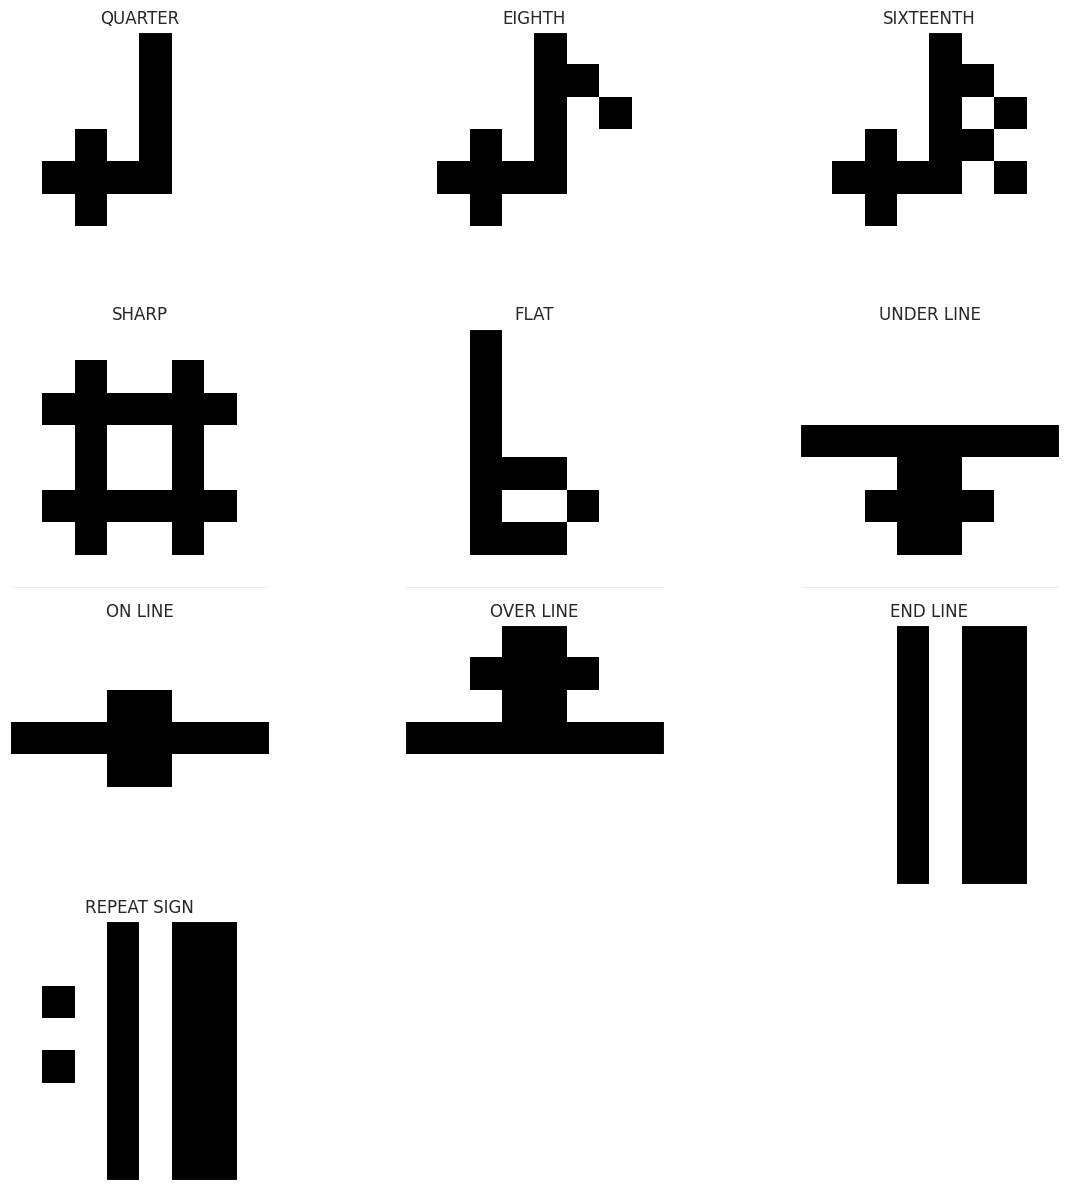

In [134]:
print(f"Displaying {len(glyphs)} training glyphs...")
display_all_glyphs(glyphs, glyphs_labels)

## Initialize **weights** and **biases**

*weights* represent the trainable parameters of the model associated with the input features. Each weight adjusts the influence of one specific input feature on the model's decision-making for a particular class.

*biases* represent the trainable parameters that act as offsets for each class. Each bias allows the model to shift the decision boundary independently of the input features.

In [135]:
weights = np.random.uniform(-0.5, 0.5, glyph_num * glyph_size)  # flattened weight matrix
biases = np.random.uniform(-0.5, 0.5, glyph_num)                # one bias per class

## Statistical Data Preparation

Prepare an empty dictionary to store cumulative statistical information.

+ *iteration*: iteration numbers during training
+ *loss*: loss values (cross-entropy) at each iteration
+ *accuracy*: accuracy values (1 if prediction is correct, 0 if not)
+ *example_digit*: indices of the glyphs used as examples during training
+ *prediction*: model predictions for the corresponding examples

In [136]:
training_stats = {
    "iteration": [],
    "loss": [],
    "accuracy": [],
    "example_glyph": [],
    "prediction": []
}

## Training and Statistics

### How it works:

1. ITERATE TRAINING EXAMPLES

   Each example is processed in sequence. example_index maps to the current training example.

2. TRAIN AND MAKE PREDICTIONS

   train_model() is called for each example. It calculates logits, probabilities, and makes a prediction.

3. CALCULATE LOSS

   Loss is calculated for the current example, indicating how well the predicted probabilities match the target label.

4. TRACK TRAINING STATISTICS

   Random samples of values like loss, accuracy, and prediction are logged to training_stats.

5. STATUS UPDATES

   Every 500 iterations, the current progress is displayed. It shows the current loss, the prediction accuracy, and a visualization of the training progress. Progress plots should usually show
    -  a decline of loss over time,
    - accuracy trends, using a moving window of 100 iterations.


    Weight visualizations display the model's learned weights for each glyph class as 8 x 8 pixel heatmaps.

6. TIME TRACKING

   The total training duration is tracked and printed after the training is done.

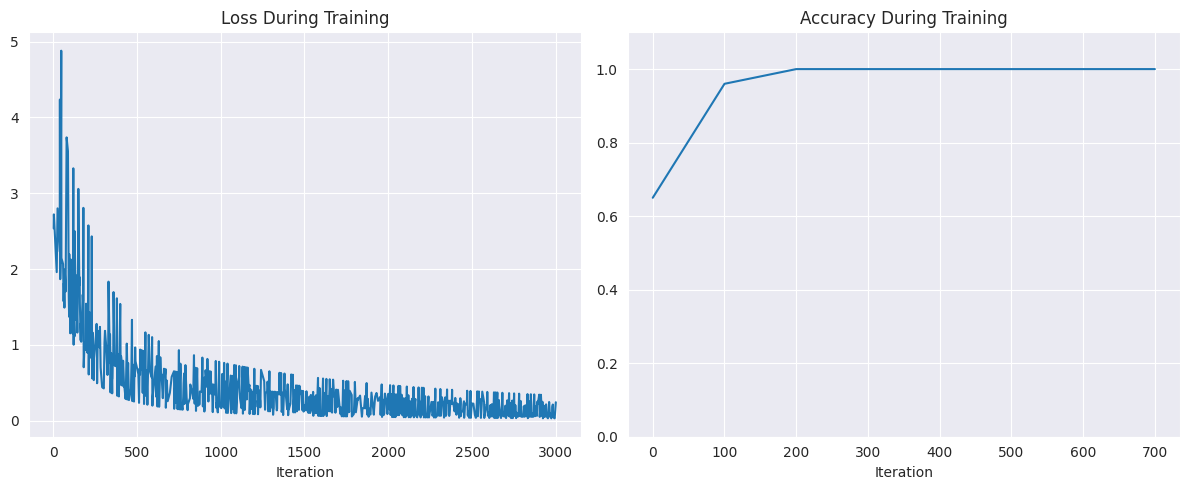

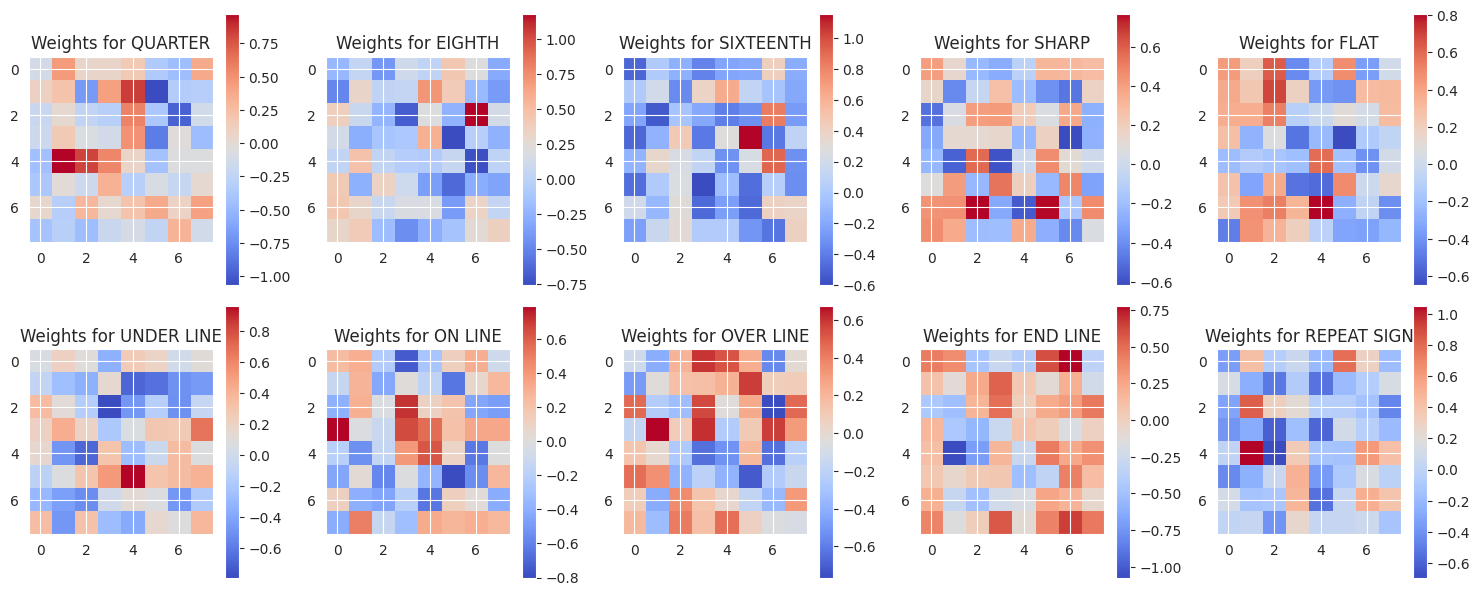

Training completed in 6.02 seconds.


In [137]:
print("Training started...")
start_time = time.time()

for index in range(training_iterations):
    example_index = index % training_num                # iterate over all examples

    prediction, probabilities, logits = train_model(    # train and predict
        glyphs[example_index], weights, biases, example_index, learning_rate
    )

    loss = -np.log(probabilities[example_index])        # calculate loss


    """
    The first condition is not easy to choose, because you want to avoid regular loggings (logging every tenth iteration would only populate the confusion matrix for digit "0", but you want to avoid logging every single iteration (as the difficulty per digit changes, this would result in a noisy loss plot). Either choose which plot you want to see (with "if i % n == 0" or "if True"), or log random iterations. Iterations for a specific digit, try "if i % 10 == target_digit".
    """
    if random.random() < .3:
        training_stats["iteration"].append(index)
        training_stats["loss"].append(loss)
        training_stats["accuracy"].append(1 if prediction == example_index else 0)
        training_stats["example_glyph"].append(example_index)
        training_stats["prediction"].append(prediction)

        if index % 500 == 0 and CUMULATIVE_STATISTICS:      # display updated status info
            clear_output(wait=True)
            print(f"Training iteration {index}/{training_iterations}")
            print(f"Current example: {example_index}")
            print(f"Prediction: {prediction} // Correct: {example_index == prediction}")
            print(f"Loss: {loss:.4f}")

            if index > 100:                                 # display training progress charts
                plt.figure(figsize=(12, 5))

                plt.subplot(1, 2, 1)                        # show loss
                plt.plot(training_stats["iteration"], training_stats["loss"])
                plt.title("Loss During Training")
                plt.xlabel("Iteration")
                plt.grid(True)

                plt.subplot(1, 2, 2)                        # show accuracy trend
                window_size = 100
                acc_values = []
                for sample_index in range(0, len(training_stats["accuracy"]), window_size):
                    if sample_index + window_size <= len(training_stats["accuracy"]):
                        acc_values.append(sum(training_stats["accuracy"][sample_index:sample_index + window_size]) / window_size)
                plt.plot(range(0, len(acc_values) * window_size, window_size), acc_values)
                plt.title("Accuracy During Training")
                plt.xlabel("Iteration")
                plt.ylim(0, 1.1)
                plt.grid(True)

                plt.tight_layout()
                plt.show()

                plt.figure(figsize=(15, 6))                 # show weights per class
                for class_index in range(glyph_num):
                    plt.subplot(2, 5, class_index + 1)
                    weight_img = weights[class_index * glyph_size:(class_index + 1) * glyph_size].reshape(8, 8)
                    plt.imshow(weight_img, cmap="coolwarm")
                    plt.title(f"Weights for {glyphs_labels[class_index]}")
                    plt.colorbar()
                plt.tight_layout()
                plt.show()

training_time = time.time() - start_time                    # show elapsed time (not much sense bc most is used for the stats)
print(f"Training completed in {training_time:.2f} seconds.")

## Show Final Statistical Information After Training

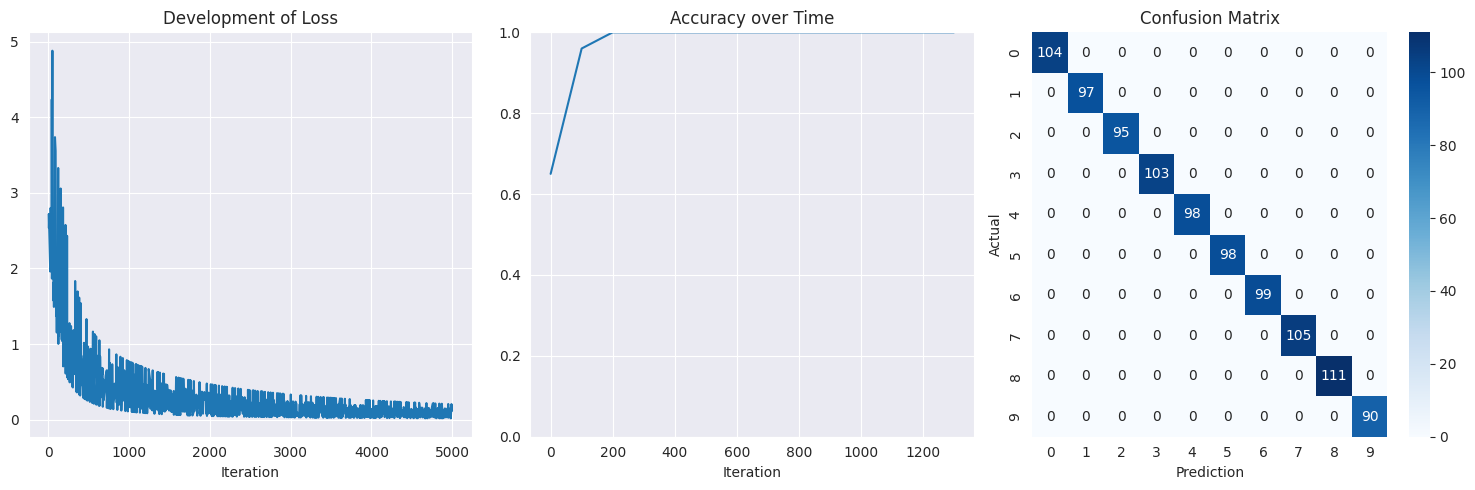

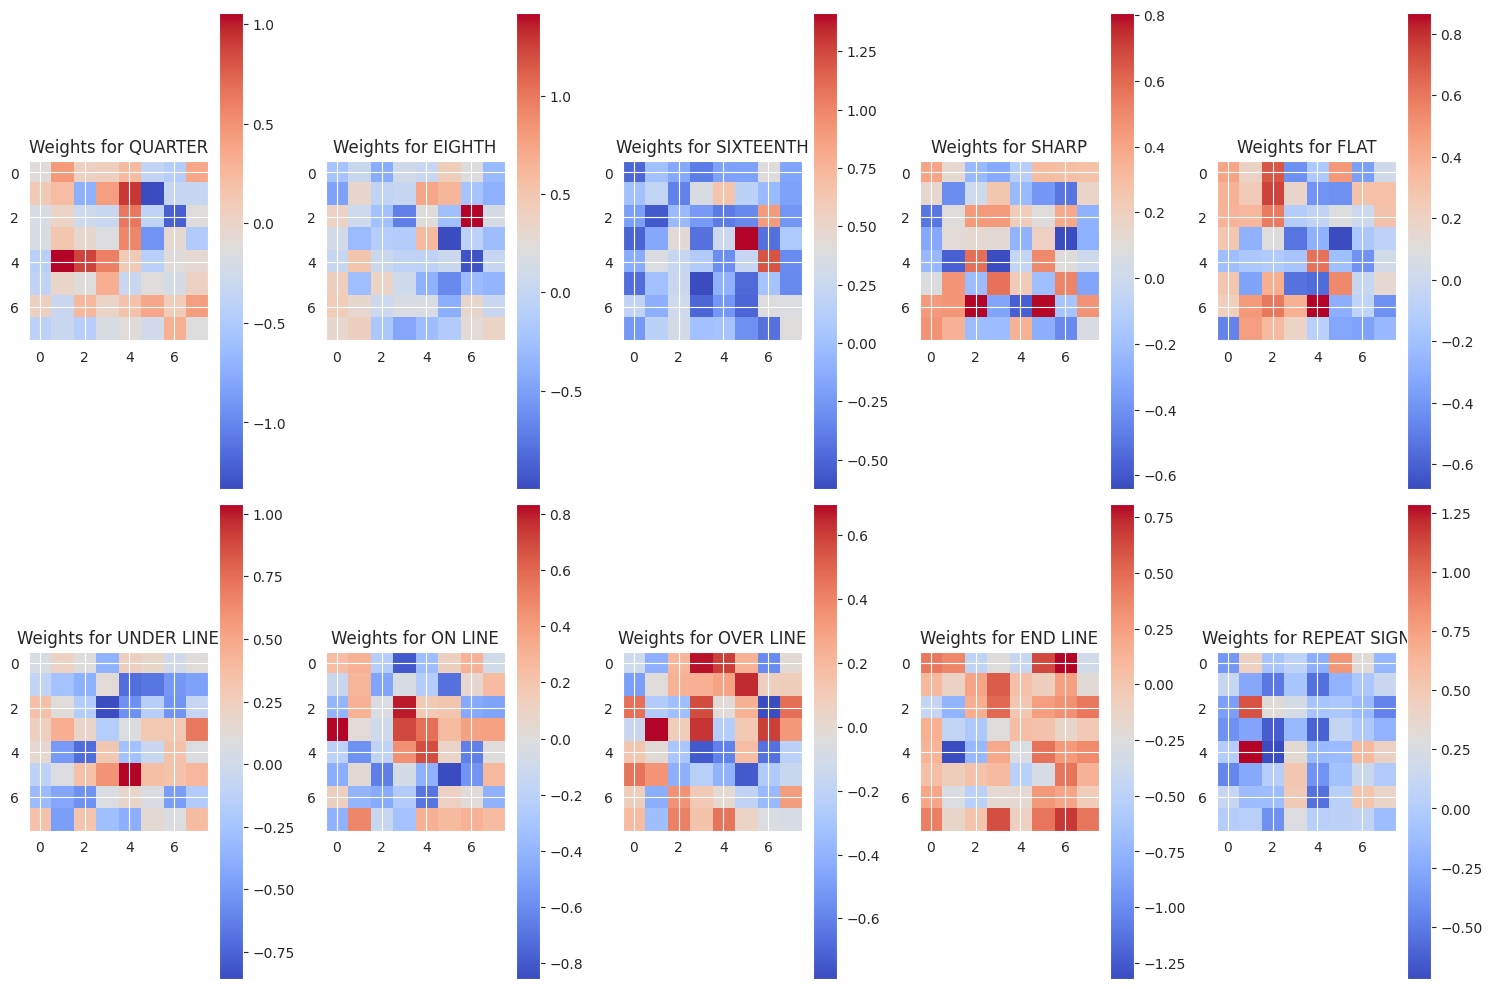

In [138]:
if FINAL_STATISTICS:
    plt.figure(figsize=(15, 5))                             # show final statistics

    plt.subplot(1, 3, 1)                                    # loss
    plt.plot(training_stats["iteration"], training_stats["loss"])
    plt.title("Development of Loss")
    plt.xlabel("Iteration")
    plt.grid(True)

    window_size = 100                                       # accuracy over time
    acc_values = []
    for step in range(0, len(training_stats["accuracy"]), window_size):
        if step + window_size <= len(training_stats["accuracy"]):
            acc_values.append(sum(training_stats["accuracy"][step:step + window_size]) / window_size)

    plt.subplot(1, 3, 2)
    plt.plot(range(0, len(acc_values) * window_size, window_size), acc_values)
    plt.title("Accuracy over Time")
    plt.xlabel("Iteration")
    plt.ylim(0, 1.0)
    plt.grid(True)

    confusion_matrix = np.zeros((glyph_num, glyph_num), dtype=int)  # show confusion matrix
    for index in range(max(0, len(training_stats["example_glyph"]) - 1000), len(training_stats["example_glyph"])):
        true_digit = training_stats["example_glyph"][index]
        pred_digit = training_stats["prediction"][index]
        confusion_matrix[true_digit, pred_digit] += 1

    plt.subplot(1, 3, 3)
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Prediction")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(15, 10))                      # show final weights
    for index in range(glyph_num):
        plt.subplot(2, 5, index + 1)
        weight_img = weights[index * glyph_size:(index + 1) * glyph_size].reshape(8, 8)
        plt.imshow(weight_img, cmap="coolwarm")
        plt.title(f"Weights for {glyphs_labels[index]}")
        plt.colorbar()

    plt.tight_layout()
    plt.show()

## The training is now complete and the model should be functional.

## Test Case A

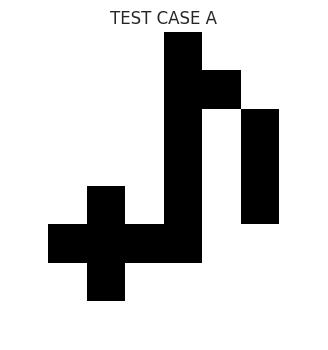


Top 5 Class Identifications for Test Case A:
-> 'EIGHTH': Probability 52.17%
-> 'SIXTEENTH': Probability 20.00%
-> 'SHARP': Probability 14.16%
-> 'QUARTER': Probability 7.17%
-> 'UNDER LINE': Probability 2.44%


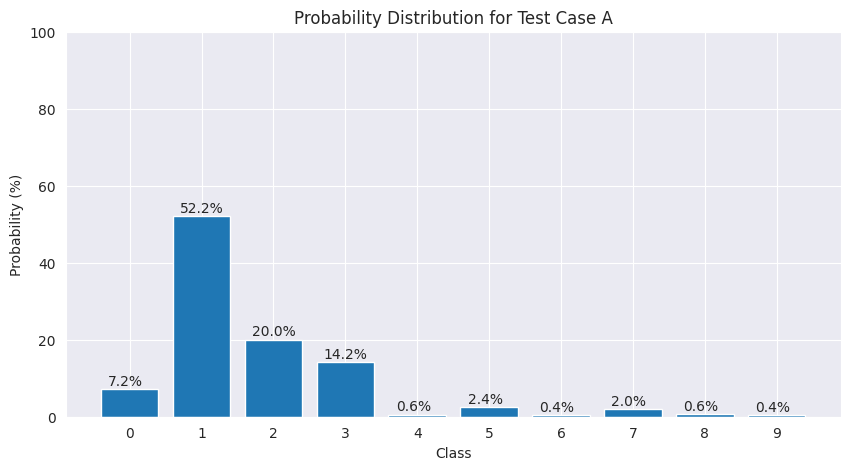

In [139]:
display_glyph(test_glyph1, "TEST CASE A")

probs1, logits1 = predict(test_glyph1, weights, biases)
top_5_indices1 = np.argsort(probs1)[-5:][::-1]

print("\nTop 5 Class Identifications for Test Case A:")
for index, idx in enumerate(top_5_indices1):
    print(f"-> '{glyphs_labels[idx]}': Probability {probs1[idx] * 100:.2f}%")

plt.figure(figsize=(10, 5))
plt.bar(range(glyph_num), probs1 * 100)
plt.title("Probability Distribution for Test Case A")
plt.xlabel("Class")
plt.ylabel("Probability (%)")
plt.xticks(range(glyph_num))
plt.ylim(0, 100)

for index, probability in enumerate(probs1):
    plt.text(index - 0.3, probability * 100 + 1, f"{probability * 100:.1f}%")

plt.show()

## Test Case B

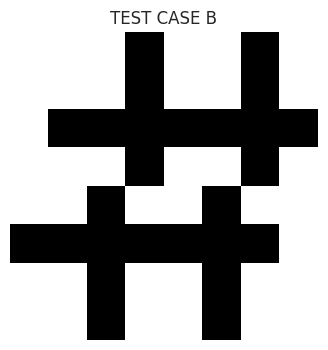


Top 5 Class Identifications for Test Case B:
-> 'SHARP': Probability 84.20%
-> 'END LINE': Probability 8.22%
-> 'OVER LINE': Probability 3.61%
-> 'FLAT': Probability 1.14%
-> 'UNDER LINE': Probability 0.89%


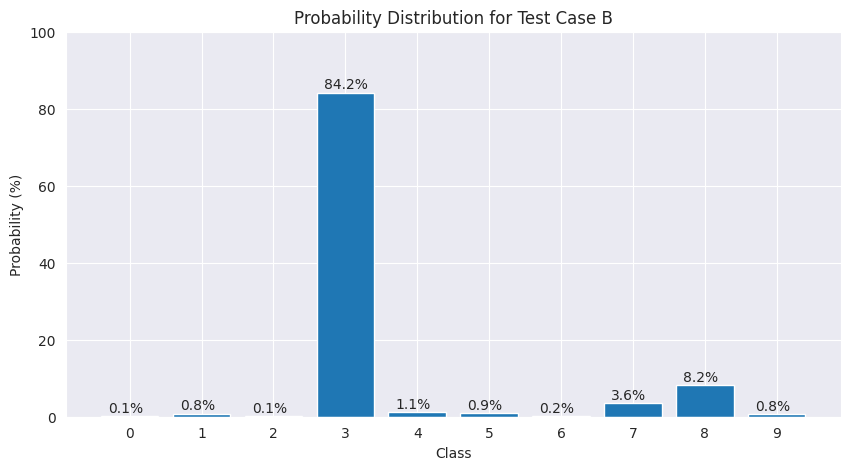

In [140]:
display_glyph(test_glyph2, "TEST CASE B")

probs2, logits2 = predict(test_glyph2, weights, biases)
top_5_indices2 = np.argsort(probs2)[-5:][::-1]

print("\nTop 5 Class Identifications for Test Case B:")
for index, idx in enumerate(top_5_indices2):
    print(f"-> '{glyphs_labels[idx]}': Probability {probs2[idx] * 100:.2f}%")

plt.figure(figsize=(10, 5))
plt.bar(range(glyph_num), probs2 * 100)
plt.title("Probability Distribution for Test Case B")
plt.xlabel("Class")
plt.ylabel("Probability (%)")
plt.xticks(range(glyph_num))
plt.ylim(0, 100)

for index, probability in enumerate(probs2):
    plt.text(index - 0.3, probability * 100 + 1, f"{probability * 100:.1f}%")

plt.show()

## Robustness Testing

Test the model's robustness by adding noise to one of the training examples. This will generate a distorted copy.

### How it works:

1. A copy of the glyph on position #5 from the training set is created (noisy_5).

2. A noise mask is generated using random binary values.
   The chance of keeping the original pixel value is 80 %, the chance of flipping is 20 %.

3. The noise mask is then applied to the glyph to create the distorted version.

4. The original glyph, the noisy version, and the noise mask are displayed.



Preparing Data for Model Robustness Test:


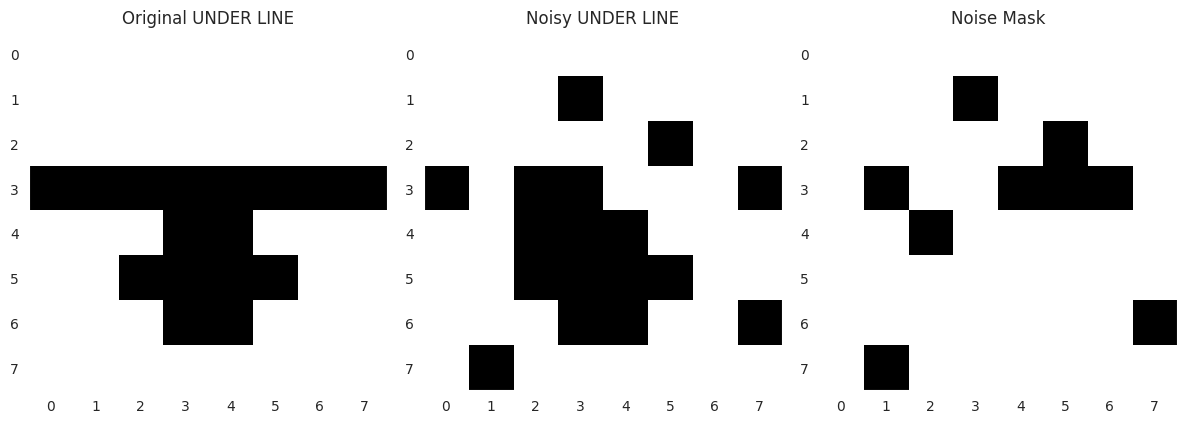

In [141]:
print("\nPreparing Data for Model Robustness Test:")

noisy_5 = glyphs[5].copy()
noise_positions = np.random.choice([0, 1], size=(8, 8), p=[0.8, 0.2])
noisy_5[noise_positions == 1] = 1 - noisy_5[noise_positions == 1]

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(glyphs[5], cmap="binary")
plt.title(f"Original {glyphs_labels[5]}")
plt.grid(False)

plt.subplot(1, 3, 2)
plt.imshow(noisy_5, cmap="binary")
plt.title(f"Noisy {glyphs_labels[5]}")
plt.grid(False)

plt.subplot(1, 3, 3)
plt.imshow(noise_positions, cmap="binary")
plt.title("Noise Mask")
plt.grid(False)

plt.tight_layout()
plt.show()

Perform a prediction with the noisy / distorted character:

In [142]:
probs_noisy, _ = predict(noisy_5, weights, biases)
top_indices_noisy = np.argsort(probs_noisy)[-5:][::-1]

print(f"Top 5 Predictions for Noisy {glyphs_labels[5]}:")
for index, idx in enumerate(top_indices_noisy):
    print(f"-> '{glyphs_labels[idx]}': Probability {probs_noisy[idx] * 100:.2f}%")

Top 5 Predictions for Noisy UNDER LINE:
-> 'UNDER LINE': Probability 61.40%
-> 'FLAT': Probability 16.17%
-> 'QUARTER': Probability 7.92%
-> 'ON LINE': Probability 4.64%
-> 'SHARP': Probability 4.13%


## Perform an Activation Analysis

First, define the helper function *plot_activations* which visualizes the activations (logits) and probabilities for a given input.

In [143]:
def plot_activations(glyph, name):
    """
    This function visualizes the activations (logits) and probabilities for a given glyph.
    """

    probs, logits = predict(glyph, weights, biases)

    plt.figure(figsize=(12, 4))

    # Display the input digit
    plt.subplot(1, 2, 1)
    plt.imshow(glyph, cmap="binary")
    plt.title(f"Input: {name}")
    plt.grid(False)

    # Visualize logits (before softmax)
    plt.subplot(1, 2, 2)
    sns.barplot(x=list(range(glyph_num)), y=logits)
    plt.title(f"Logits Before Softmax")
    plt.xlabel("Glyph")
    plt.ylabel("Activation")

    plt.tight_layout()
    plt.show()

    # Visualize probabilities after softmax
    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(range(glyph_num)), y=probs * 100)
    plt.title(f"Probabilities After Softmax for {name}")
    plt.xlabel("Glyph")
    plt.ylabel("Probability (%)")
    plt.ylim(0, 100)

    for index, probability in enumerate(probs):
        plt.text(index - 0.1, probability * 100 + 1, f"{probability * 100:.1f}%")
    plt.show()

    return probs, logits

Then, do the analysis using the new helper function.

Displaying Activation Analysis...


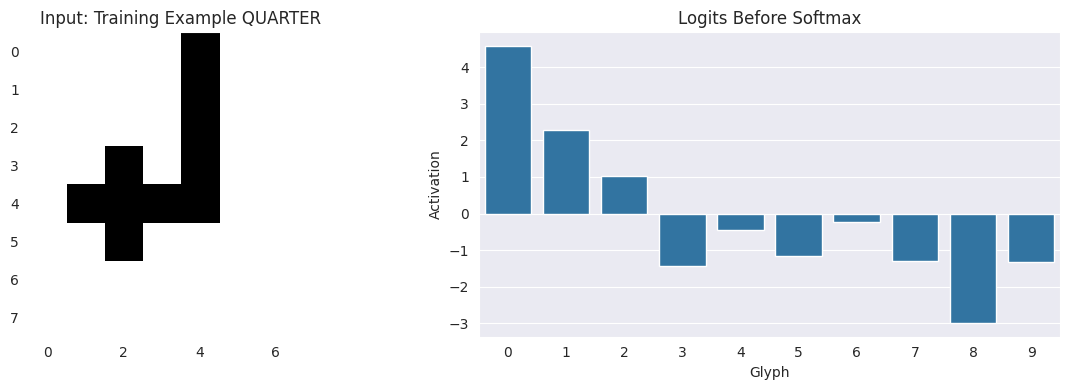

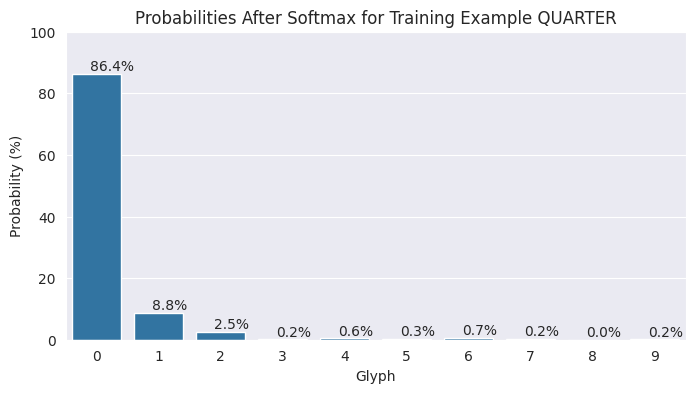

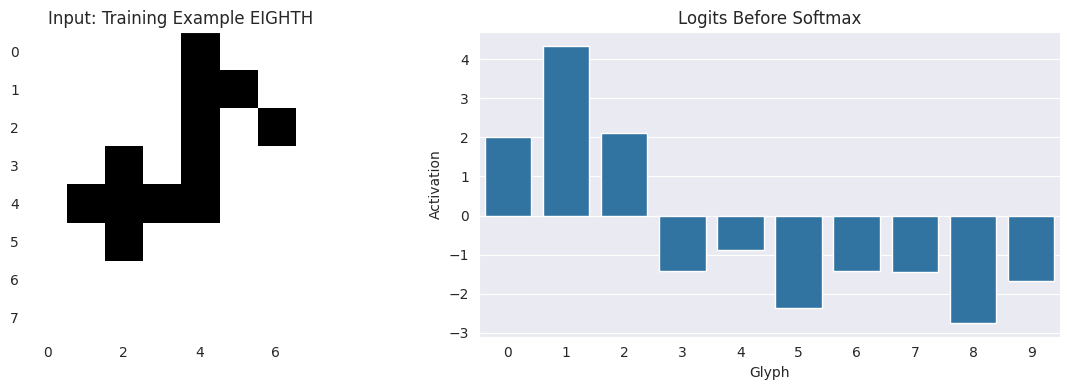

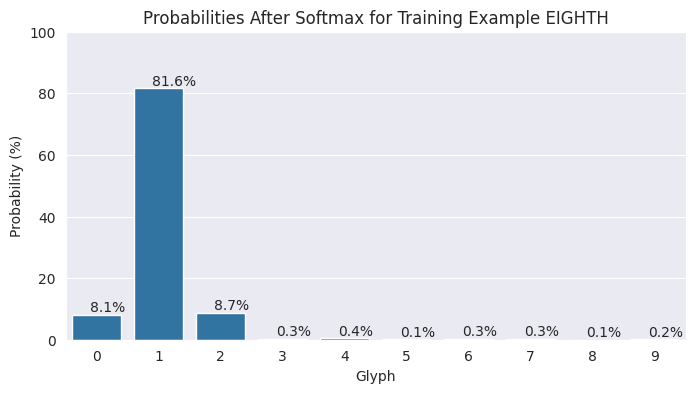

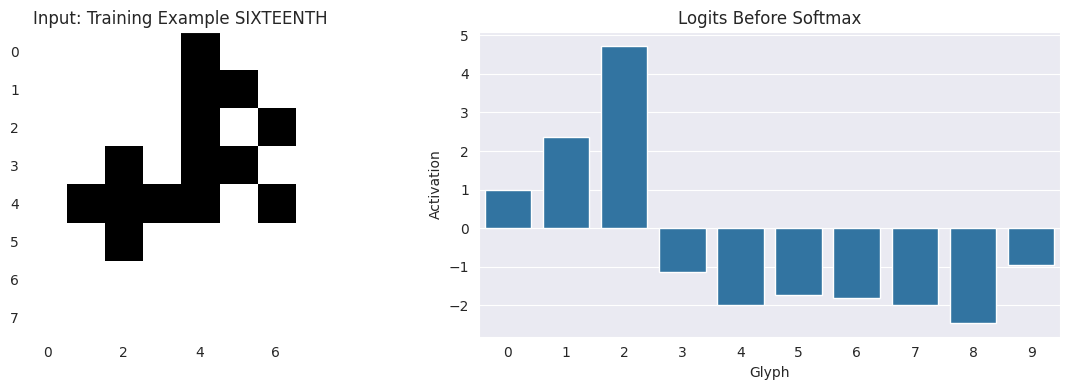

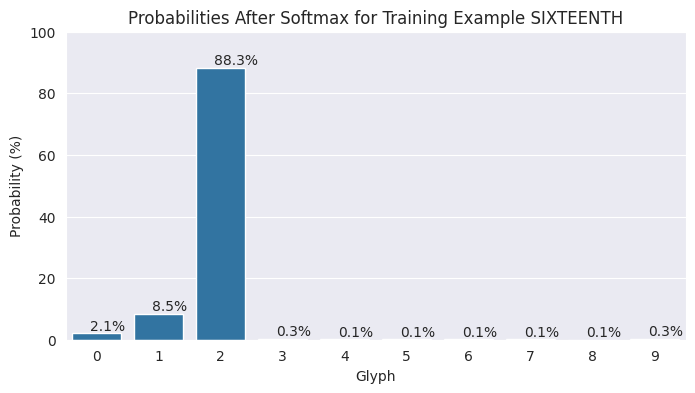

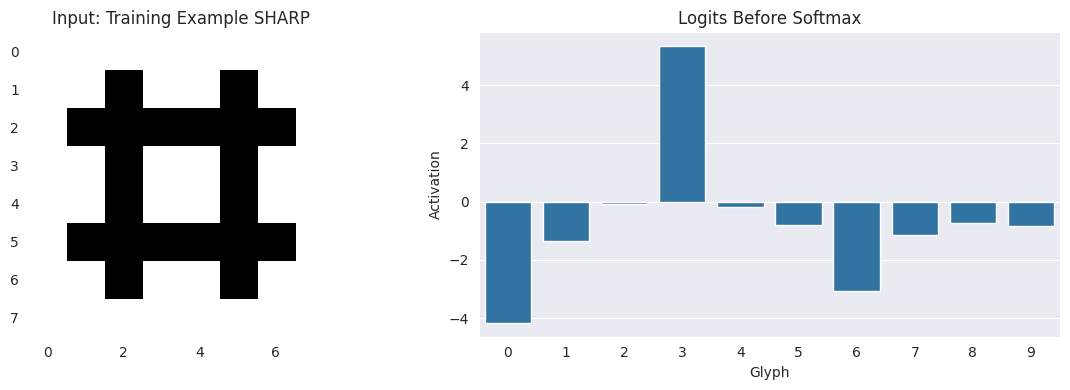

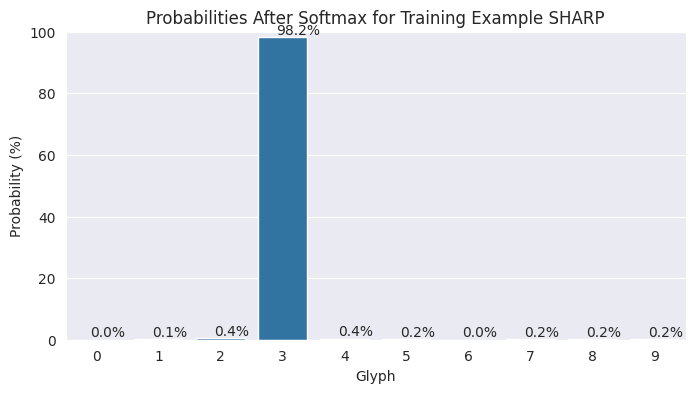

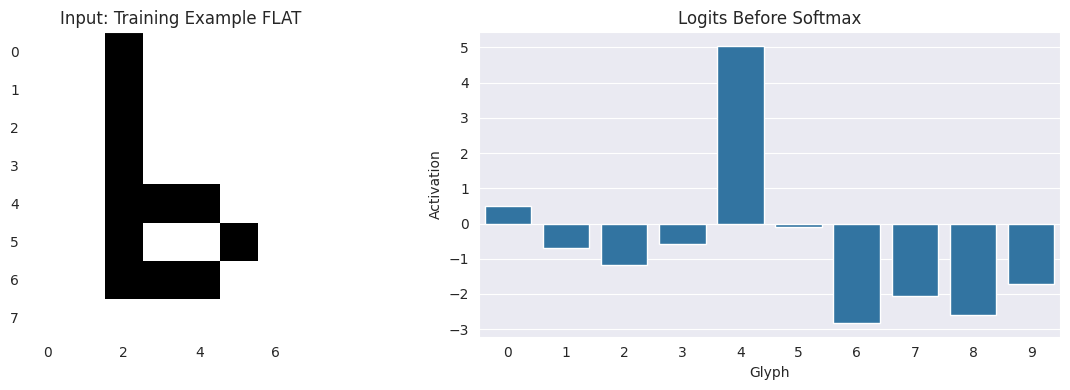

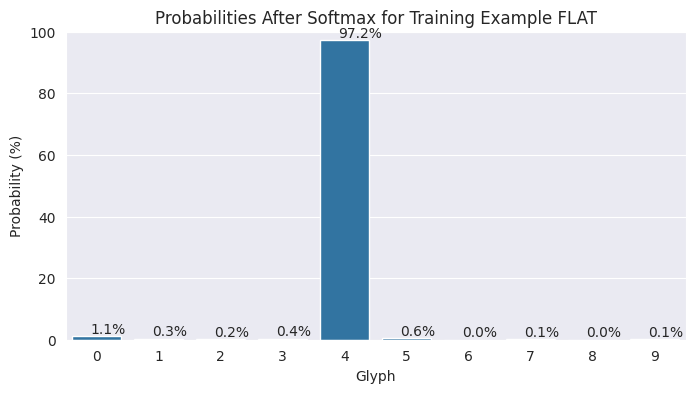

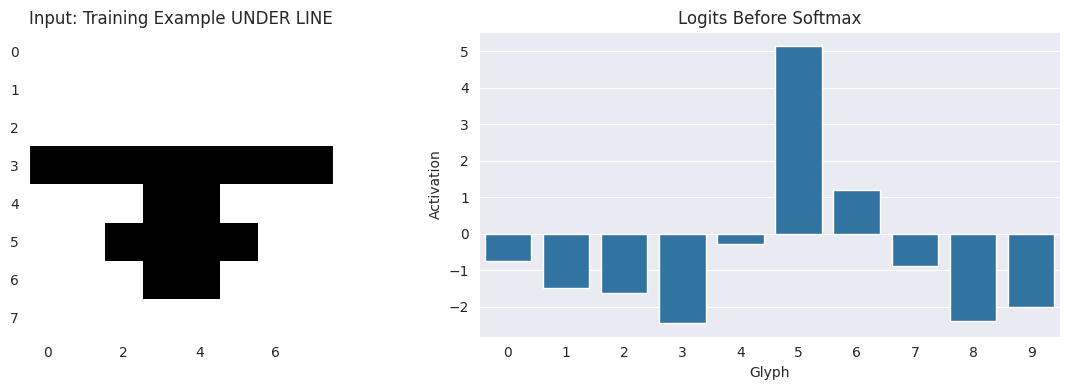

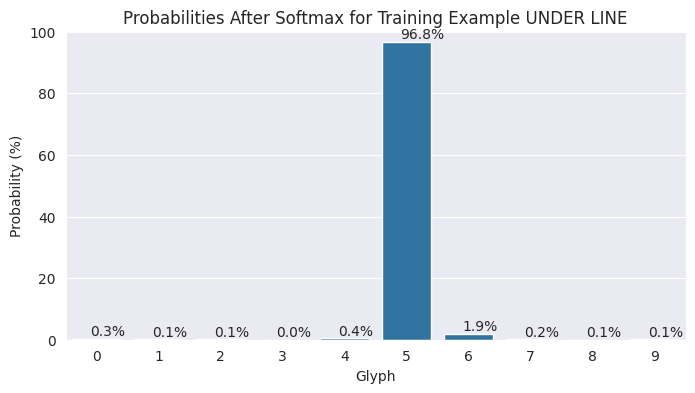

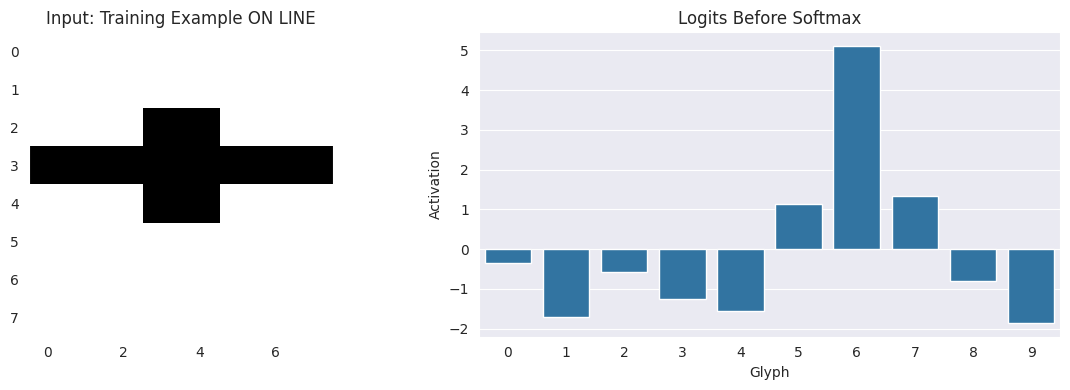

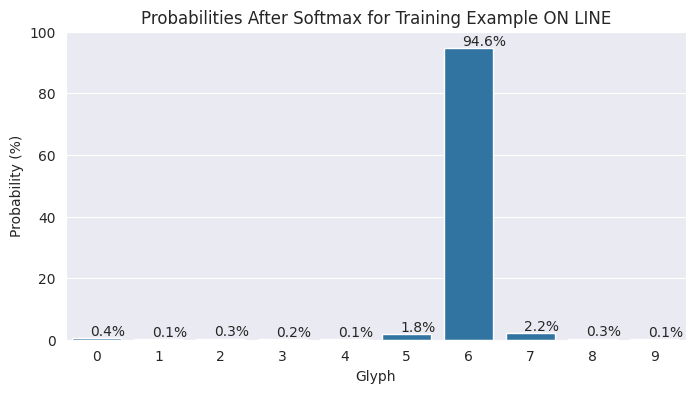

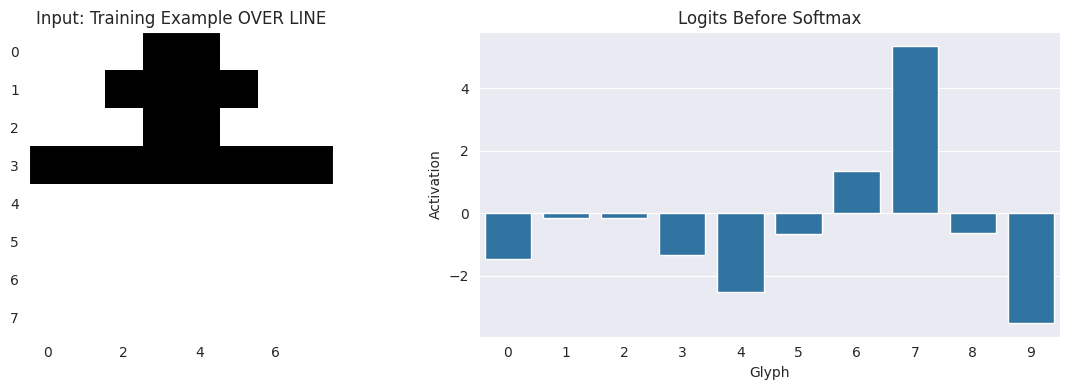

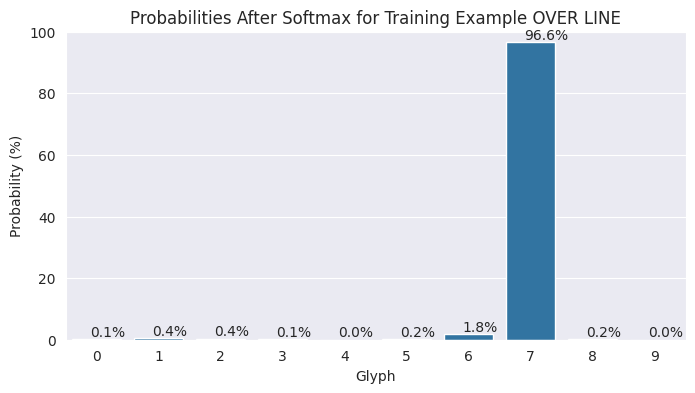

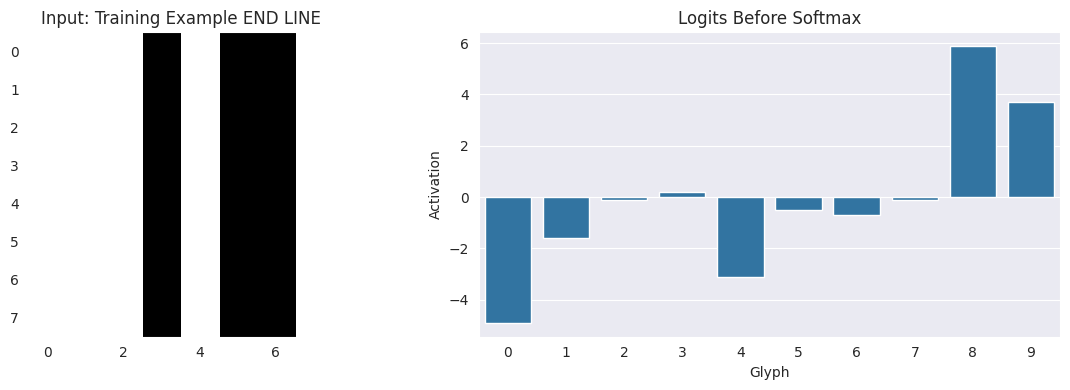

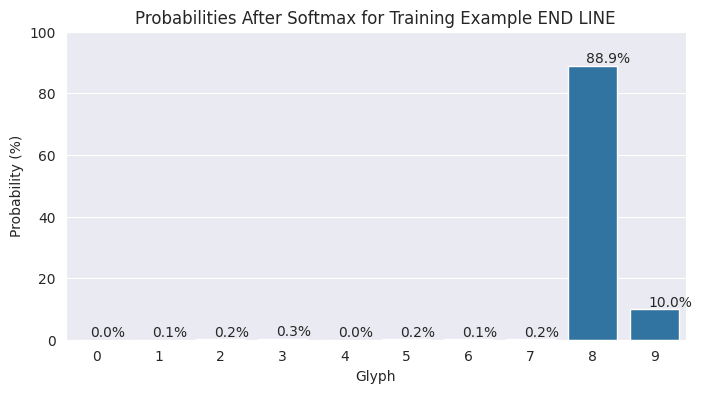

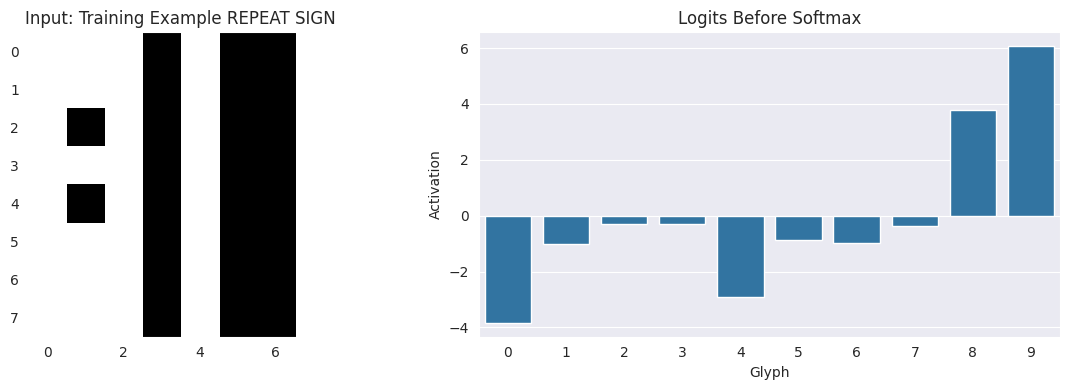

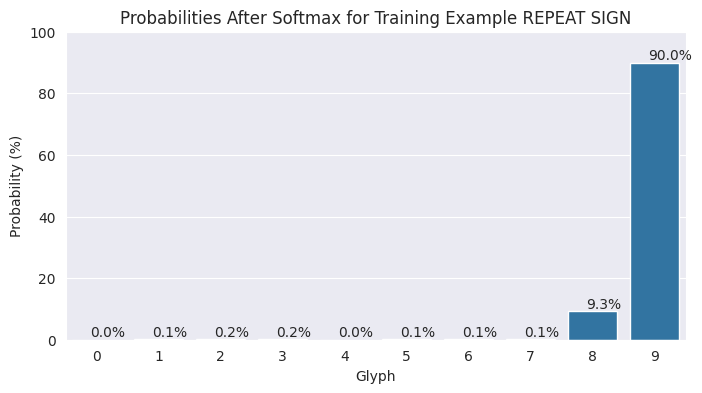

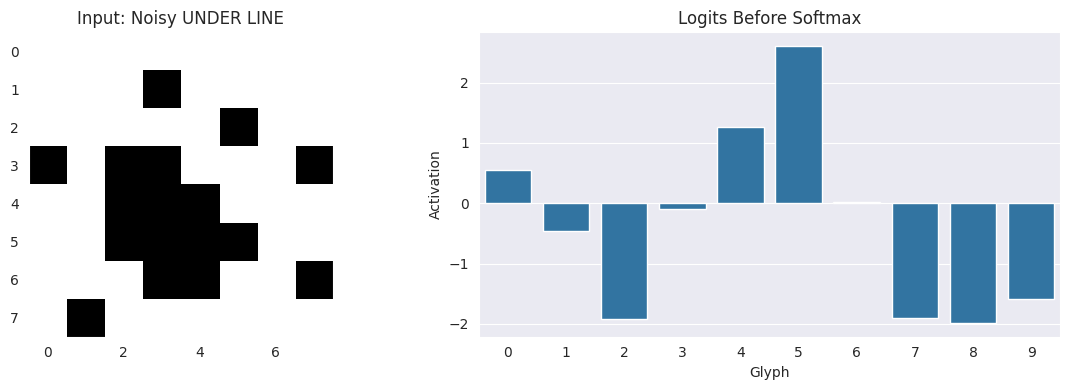

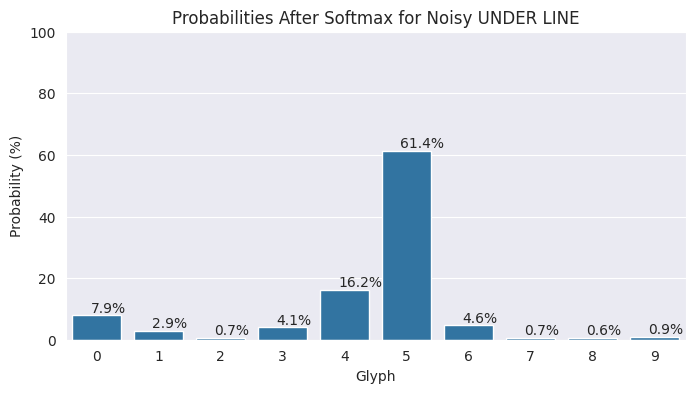

(array([0.07918045, 0.02851687, 0.00669863, 0.04128757, 0.16174807,
        0.61397039, 0.04635615, 0.00678988, 0.00624204, 0.00920995]),
 array([ 0.55714656, -0.46408718, -1.91268017, -0.09402131,  1.2714571 ,
         2.60536379,  0.02177108, -1.89914897, -1.98327602, -1.59429868]))

In [144]:
print("Displaying Activation Analysis...")

# Analyze original training examples
for index in range(glyph_num):
    probs, logits = plot_activations(glyphs[index], f"Training Example {glyphs_labels[index]}")

# Analyze noisy 5
plot_activations(noisy_5, f"Noisy {glyphs_labels[5]}")

## Show Final Summary About the Model

In [145]:
print("FINAL SUMMARY\n=============")

print("\n\nModel Parameter Overview\n------------------------\n")
print(f"Total Number of Parameters: {weights.size + biases.size}")
print(f"Number of Weights         : {weights.size}")
print(f"Number of Biases          : {biases.size}")
print(f"Parameters per Class      : {glyph_size + 1}")

print("\n\nModel Summary\n-------------\n")
print(f"Training Time             : {training_time:.2f} seconds")
print(f"Training Iterations       : {training_iterations}")
print(f"Training Examples         : {training_num}")

# Calculate final training accuracy over all training examples
correct = 0
for index in range(glyph_num):
    probs, _ = predict(glyphs[index], weights, biases)
    if np.argmax(probs) == index:
        correct += 1

print(f"Final Training Accuracy   : {correct / 10 * 100:.1f}%")

FINAL SUMMARY


Model Parameter Overview
------------------------

Total Number of Parameters: 650
Number of Weights         : 640
Number of Biases          : 10
Parameters per Class      : 65


Model Summary
-------------

Training Time             : 6.02 seconds
Training Iterations       : 5000
Training Examples         : 10
Final Training Accuracy   : 100.0%


+ The model uses a simple linear classifier with a softmax output.
+ Training is achieved using Stochastic Gradient Descent (SGD).
+ Basic architecture: Input (8 x 8 pixels) -> Linear Layer -> Softmax -> 10 Classes

## COME PLAY WITH ME!!

ML is about experimenting. If something surprising happens, think about why. Sometimes, changing just one simple setting has enormous consequences.

### Change the Learning Rate

The learning rate controls how much the network adjusts weights after each training step. Search for the variable "learning_rate" and try changing it to different values:
+ Low values (e.g. 0.001) -> training will be slow, but might lead to a better final model.
+ High values (e.g., 0.5) -> training will be fast, but the model might become unstable.
+ Very high values (e.g., > 1.0) -> may cause the system to explode and training to fail entirely

What to watch for:
+ How is the loss decrease?
+ Does the accuracy improve, or does it fluctuate wildly?
+ Is there a "sweet spot" learning rate?
+ Watch the "Loss During Training" and "Accuracy During Training" plots to see what you've done! :)

### Change the Number of Training Iterations

Search for the variable training_iterations to adjust it:
+ Low values (e.g., 100) -> when will the model start to fail?
+ High values (e.g., 100000) -> does the accuracy improve with more training?

What to watch for:
+ Does the model improve with additional training?
+ When will it stop getting better?
+ When does the loss over time plot start to flatten out?

### Reduce the Training Data

Instead of training the model with ten glyphs, find out what happens if you reduce this. Will the remaining glyphs be recognized more securely?

In order to do this, find where the code stores
+ the training data itself
+ and the number of training data,
(or, to put it more straightforwardly: look for the variables "glyphs" and "training_num"), then
+ reduce the number, and
+ decide which training data to keep and which to discard.

What to watch for:
+ How does this affect the recognition?
+ What happens if you pick similar-looking glyphs?
+ Or different-looking glyphs?
+ What happens if you test it with a missing glyph?

Bonus Challenge, Boss Level:
+ Try combining both glyph sets -- and you're going to have twenty glyph classes to play with!

### Destroy the Training Data

Right now, we have ten different glyph classes. But what if we take one out (say, the "3", in digit mode), and copy another into its place (say, the "8")? So we would now have nine different ones, but the digit "8" occurs twice.

What to watch for:
+ How will the model react?
+ Will it predict exactly twice the amount of "8"s, will it split "8"s randomly between the two identical classes, or what?
+ How will it react to the missing glyph class as input data?

### Change the Training Data

Right now, the training data is a set of pixel images for music symbols or digits. Why not change it to
+ ten letters, or
+ ten emoji, or
+ guitar tablature, or
+ kana, simple kanji, or hangul characters,
and so on?

What to watch for:
+ What can the model do?
+ Try finding an application that seems really, really, really unintuitive. High diving poses, anyone?

### Change the Biases

To better understand how biases affect the outcome, try to change them and find out what happens. Remember: Biases affect the model before it even sees any input. They actually shift the starting point of each class.

In order to do this, find where the code initializes the biases with random numbers. Change this so
+ all biases start at 0.0 (*np.zeros(n_classes)*), or
+ increase the randomness by enlarging the range, or
+ give one specific number a "bias boost" (e.g., *biases[5] = 5.0*).

What to watch for:
+ Do bias settings affect the learning process?
+ Do certain glyph classes actually become more likely because of a higher bias setting?

### Dive into the Loss Plot

Usually, the loss plot looks quite noisy. Different digits have different recognition difficulty levels, so you see a combination of a simple descending graph with lots of weird noise on top.

Try finding out which glyph classes result in clear output, and which cause the noise.

What to watch for:
+ Which glyph classes are especially difficult?
+ Can you speculate on the reason?

Tip: You may want to change the logging functionality for this. Right now, random iterations are logged. But if you want all cases of glyph class 2 recognition (and nothing else) to be logged, try a condition like "if example_index == 2:" instead. You can easily adapt this to any other class by changing the number.

### Change the Noise Level in the Robustness Test

The model currently adds random noise to one glyph class to see if it still recognizes it. The noise level is at 80 % / 20 %. Try increasing or decreasing the noise! Look for the line "p=[0.8, 0.2]" in the noise mask creation.

What to watch for:
+ At which setting does the model start to struggle recognizing the noisy glyph?
+ Does it confuse it with another glyph or does it act randomly?

### Finally: The Ultimate Break the Model Challenge!!!

+ Combine multiple changes, like a high learning rate with absurd biases. Does the model still learn?
+ Build a really bad setup! What happens if you combine a very high learning rate with only a few iterations of training?
+ Try to initialize the biases so unevenly that the model will always predict glyph class 7.
+ Try to flip the training data upside down -- but not by hand, but by code.
+ Ever thought of training a model with noise instead of actual data?
+ Think of something weird, try implementing it, and watch your computer cry.